# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This soccer database comes from **Kaggle**,  It contains:

- +25,000 matches
- +10,000 players
- +11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

### Available Datasets
- **country** : Contains 11 countries, with country names their IDs
- **league** : Contains 11 leagues, with league names, IDs and associated country names
- **match** : Contains 115 column and 25979 match records
- **player** : Contains data of 11060 player and player features such as : player_name, birthday, weight, height
- **player Attributes** : Contains players characteristics from different dates
- **team** : Contains 299 teams, with Id, long name, short name
- **team Attributes** : Contains 1458 different records of game plans ( team attributes )

### Relationship between Datasets
- **country & league** : country_id
- **league & match** : league_id
- **match & player** : player id, player_api_id, player_fifa_api_id
- **player & player Attributes** : player_id, player_api_id, player_fifa_api_id
- **match & team** : home_team_id, away_team_id
- **team & team Attributes** : team_id

### Question(s) for Analysis

- **What team attributes lead to the most victories**
- **what is the playing strategy (game plan)**
- **What teams improved the most/least over the time period**
- **What players are the best players**
>  **Extra sub question :**
    - **Youngest players**
    - **Best youngest player**
    - **Oldest player**

In [1]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime

import warnings
warnings.filterwarnings('ignore')

% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### Reading Data

In [2]:
country_df = pd.read_csv('Database_Soccer/Country.csv')
league_df = pd.read_csv('Database_Soccer/League.csv')
match_df = pd.read_csv('Database_Soccer/Match.csv')
player_df = pd.read_csv('Database_Soccer/Player.csv')
player_Attributes_df = pd.read_csv('Database_Soccer/Player_Attributes.csv')
team_df = pd.read_csv('Database_Soccer/Team.csv')
team_Attributes_df = pd.read_csv('Database_Soccer/Team_Attributes.csv')


In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.



### Data Cleaning

 

#### Dealing with 
**country_df** & **league_df**

In [4]:
country_df

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [5]:
rows, columns = country_df.shape
print(f'rows : {rows} | columns : {columns}')

rows : 11 | columns : 2


**country_df** Dataset contains 11 rows each one indicates a different country, and 2 columns one for the id and the other for the country name

In [6]:
league_df

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [7]:
rows, columns = league_df.shape
print(f'rows : {rows} | columns : {columns}')

rows : 11 | columns : 3


**league_df** DataSet contains 11 rows each one indicates a different league, and 3 columns : one for the league id, the second for the league country id and the last one for the league name

> As it appears both **country_df** and **league_df** datasets are similar, and can be merged into one dataset called **country_league_df** that contains **country id**, **country name**, **league id** and **league name**

In [8]:
# Renaming 'id' country_df's column to 'country id', so we can use it as a common column name when merging the two datasets 
country_df.rename({"id": "country_id"}, axis=1, inplace=True)
# Merging country_df and league_df datasets on 'country_id' column 
country_league_df = pd.merge(country_df, league_df, on='country_id')
# Renaming the output's columns to get a clean output
country_league_df.rename({"country_id": "country id", "id": "league id", "name_x": "country name", "league_id": "league_id", "name_y": "league name"}, axis=1, inplace=True)

#### Checking datatypes

In [9]:
country_league_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 4 columns):
country id      11 non-null int64
country name    11 non-null object
league id       11 non-null int64
league name     11 non-null object
dtypes: int64(2), object(2)
memory usage: 440.0+ bytes


#### Output as country_league_df

In [10]:
country_league_df

,country id,country name,league id,league name
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A
5,13274,Netherlands,13274,Netherlands Eredivisie
6,15722,Poland,15722,Poland Ekstraklasa
7,17642,Portugal,17642,Portugal Liga ZON Sagres
8,19694,Scotland,19694,Scotland Premier League
9,21518,Spain,21518,Spain LIGA BBVA


#### Dealing with
**match_df**

In [11]:
rows, columns = match_df.shape
print(f'rows : {rows} | columns : {columns}')

rows : 25979 | columns : 115


In [12]:
## Setting up pandas parameters to dispmay all rows and columns to get a better overview of the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
## 'match_df' dataset sample
match_df.sample(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
12510,12511,10257,10257,2013/2014,9,2013-10-27 00:00:00,1536606,9875,9804,2,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,4.0,7.0,1.0,3.0,5.0,7.0,9.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,7.0,10.0,10.0,30660.0,39535.0,155050.0,34029.0,49860.0,25818.0,30940.0,46104.0,41658.0,193441.0,25759.0,42692.0,46820.0,150670.0,34008.0,130155.0,41816.0,41432.0,186764.0,39391.0,41269.0,27733.0,<goal><value><comment>p</comment><stats><penal...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,1.33,5.00,8.50,1.31,5.00,9.75,1.35,4.8,7.60,1.36,4.5,9.00,1.37,5.19,10.46,1.36,4.50,9.00,1.33,4.50,8.50,1.36,5.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN
23605,23606,21518,21518,2013/2014,26,2014-03-02 00:00:00,1506070,8302,8560,1,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,97498.0,151063.0,95509.0,33848.0,314605.0,40940.0,39106.0,242783.0,25773.0,38821.0,166648.0,37421.0,485141.0,33959.0,282676.0,162497.0,38540.0,102622.0,150649.0,99047.0,184138.0,75342.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,1.91,3.75,3.60,2.05,3.80,3.50,2.10,3.3,3.30,2.05,3.5,3.40,1.94,3.84,4.05,2.00,3.20,4.00,1.95,3.75,3.75,2.00,3.75,3.80,NaN,NaN,NaN,NaN,NaN,NaN
14944,14945,13274,13274,2013/2014,23,2014-02-09 00:00:00,1473227,9791,7788,1,1,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,26547.0,213167.0,188089.0,110142.0,192303.0,25259.0,209413.0,213682.0,179218.0,212819.0,243439.0,189958.0,147601.0,37195.0,110145.0,215369.0,99323.0,45831.0,179115.0,243421.0,45898.0,240346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.85,3.75,3.90,1.78,3.60,3.90,1.85,3.3,3.70,1.90,3.4,3.50,2.01,3.56,4.04,1.91,3.60,3.50,1.90,3.60,3.75,1.95,3.75,3.75,NaN,NaN,NaN,NaN,NaN,NaN
17969,17970,17642,17642,2009/2010,2,2009-08-23 00:00:00,686106,7844,9772,0,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,97363.0,97493.0,42463.0,97486.0,97488.0,11897.0,97484.0,97508.0,25998.0,18549.0,149845.0,30967.0,11754.0,30968.0,52133.0,26861.0,41467.0,79574.0,46509.0,34653.0,35425.0,37576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60,3.25,1.85,4.30,3.35,1.72,4.30,3.2,1.75,4.33,3.4,1.67,NaN,NaN,NaN,3.80,3.25,1.80,3.60,3.20,2.00,4.00,

> **Notice**
the following columns : 
goal
 ,shoton
 ,shotoff
 ,foulcommit
 ,card
 ,cross
 ,corner
 ,possession
are **invalide** 

In [13]:
match_df.isna().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3       1832
home_player_Y4       1832
home_player_Y5       1832
home_player_

> **Notice**
almost the rest of the columns starting from 'home_player_X1' are either **unexplainable** (such as PSH, PSD, PSA ... ), **invalide** ( such as foulcommit, cardor...) **missing** ( such as goal, shoton...)

#### Keeping columns that appears to be useful (for now) for our data analysis

In [14]:
# Keeping useful columns
match_df.drop(match_df.columns.difference(['id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']), 1, inplace=True)

#### Output for 'match_df' Dataset

In [15]:
match_df.sample(30)

,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
6405,6406,4769,2012/2013,2,2012-08-19 00:00:00,1216828,8592,9874,2,0
23006,23007,21518,2011/2012,6,2011-09-24 00:00:00,1051708,8634,9906,5,0
8629,8630,7809,2010/2011,30,2011-04-17 00:00:00,857354,9789,8358,3,0
5046,5047,4769,2008/2009,34,2009-05-02 00:00:00,483498,9853,8481,0,0
4161,4162,1729,2014/2015,23,2015-01-31 00:00:00,1724205,8667,10261,0,3
1994,1995,1729,2008/2009,33,2009-04-18 00:00:00,489369,8462,8559,1,0
953,954,1,2011/2012,4,2011-08-20 00:00:00,1032721,10001,9991,2,3
14916,14917,13274,2013/2014,20,2014-01-26 00:00:00,1473199,7788,10228,3,1
3624,3625,1729,2012/2013,9,2012-10-27 00:00:00,1229192,9798,9879,3,3
620,621,1,2010/2011,21,2010-12-26 00:00:00,838733,8635,9989,6,0


In [16]:
# Changing date column type to datetime
match_df['date'] = pd.to_datetime(match_df['date'])

#### Dealing with
**player_df** & **player_Attributes_df**

In [17]:
rows, columns = player_df.shape
print(f'rows : {rows} | columns : {columns}')

rows : 11060 | columns : 7


In [18]:
# Viewing 'player_df' dataset head
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [19]:
player_df.isna().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

> **Notice** that there is no missing values,


In [20]:
player_df['id'].duplicated().sum()


0

> **Notice** that there is no duplicated players

**Therefore this dataset needs no cleaning for now**

In [21]:
# Viewing player_attributes_df dataset head
player_Attributes_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [22]:
rows, columns = player_Attributes_df.shape
print(f'rows : {rows} | columns : {columns}')

rows : 183978 | columns : 42


In [23]:
player_Attributes_df.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

> **Notice** that there are many missing values in almost every column

**and because we have more than 180k rows we can just drop rows containing missing values**

In [24]:
# Dropping rows that contains missing values
player_Attributes_df.dropna(inplace = True)


In [25]:
player_Attributes_df.shape

(180354, 42)

> **Notice** we are left with 180k rows after dropping rows with missing values


In [26]:
player_df.query('player_api_id == 505942')

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [27]:
player_Attributes_df.query('player_api_id == 505942')

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


**Note:** player_Attributes_df dataset contains different records for players from player_df dataset

> **Therefore we can merge both player_df & play_Attributes_df datasets to one data set using 'player_api_id' column as a common column for both datasets**

In [28]:
# Merging the two datasets on 'player_api_id'
full_player_attributes_df = pd.merge(player_df, player_Attributes_df, on='player_api_id')
# Removing duplicated column
full_player_attributes_df.drop('player_fifa_api_id_y', axis=1,inplace=True)
# Renaming the Output's columns inorder to get a clean Output
full_player_attributes_df.rename({"id_x": "player id"}, axis=1, inplace=True)
full_player_attributes_df.rename({"id_y": "record id"}, axis=1, inplace=True)

#### Checking types

In [29]:
full_player_attributes_df.dtypes

player id                 int64
player_api_id             int64
player_name              object
player_fifa_api_id_x      int64
birthday                 object
height                  float64
weight                    int64
record id                 int64
date                     object
overall_rating          float64
potential               float64
preferred_foot           object
attacking_work_rate      object
defensive_work_rate      object
crossing                float64
finishing               float64
heading_accuracy        float64
short_passing           float64
volleys                 float64
dribbling               float64
curve                   float64
free_kick_accuracy      float64
long_passing            float64
ball_control            float64
acceleration            float64
sprint_speed            float64
agility                 float64
reactions               float64
balance                 float64
shot_power              float64
jumping                 float64
stamina 

> **Notice** the date and birthday column is object type (string) which should be a datetime type

Therefore we should change the columns type to the datetime-type

In [30]:
# Changing 'date' and 'birthday' columns type to datetime 
full_player_attributes_df['date'] = pd.to_datetime(full_player_attributes_df['date'])
full_player_attributes_df['birthday'] = pd.to_datetime(full_player_attributes_df['birthday'])

In [31]:
# Checking column's type
full_player_attributes_df[['date', 'birthday']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 180353
Data columns (total 2 columns):
date        180354 non-null datetime64[ns]
birthday    180354 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.1 MB


#### Checking missing values

In [32]:
full_player_attributes_df.isna().sum().sum()

0

#### full player attributes Dataset Output

In [33]:
full_player_attributes_df.head()

,player id,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,record id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,3,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,4,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,5,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [34]:
full_player_attributes_df.describe()

,player id,player_api_id,player_fifa_api_id_x,height,weight,record id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,5520.609207,137653.145514,166805.312530,181.877895,168.774593,91995.886274,68.635317,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,59.265755,53.001408,49.392783,57.084578,63.453846,67.709405,68.101628,65.995082,66.148297,65.190082,61.866474,66.977333,67.053401,67.432477,53.387560,60.946217,51.897374,55.730730,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,3190.378836,137599.735284,52825.971635,6.398588,15.098388,53092.657914,7.027950,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,17.741351,18.245476,17.820262,14.412035,15.187692,13.011580,12.585984,12.963670,9.145011,13.076192,16.129537,11.017828,13.200669,12.085131,18.370204,16.101618,19.483338,18.458218,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,1.000000,2625.000000,2.000000,157.480000,117.000000,1.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2758.000000,35451.000000,156593.000000,177.800000,159.000000,46074.250000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,59.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,5533.000000,80291.000000,183774.000000,182.880000,168.000000,92003.500000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,66.000000,68.000000,69.000000,69.000000,58.000000,64.000000,56.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,8253.000000,192841.000000,200130.000000,185.420000,179.000000,137935.750000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000,183978.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,95.000000,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


#### Dealing with 
**team_df** & **team_Attributes_df** 

In [35]:
# Viewing team_df head
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [36]:
rows, columns = team_df.shape
print(f'rows : {rows} | columns : {columns}')

rows : 299 | columns : 5


In [37]:
team_df.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

**There is no need to deal with the 'team_fifa_api_id' column's missing values, because we can use 'team_api_id' column for merging operation later on**


In [38]:
team_Attributes_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [39]:
rows, columns = team_Attributes_df.shape
print(f'rows : {rows} | columns : {columns}')

rows : 1458 | columns : 25


In [40]:
team_Attributes_df.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [41]:
team_Attributes_df.isna().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

**Notice** That there are too many values that are missing  from 'buildUpPlayDribbling' column (more than 60%)

**Therefore** we can fill missing values with the mean value of the column

In [42]:
team_Attributes_df['buildUpPlayDribbling'].fillna((team_Attributes_df['buildUpPlayDribbling'].mean()), inplace=True)

In [43]:
team_df.query('team_fifa_api_id == 434')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
288,49119,9930,434.0,FC Aarau,AAR


In [44]:
team_Attributes_df.query('team_fifa_api_id == 434')

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,48.607362,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.000000,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.000000,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


**Note:** team_Attributes_df dataset contains different records of teams from teams_df dataset

> **Therefore we can merge both team_df & team_Attributes_df datasets to one data set using 'team_api_id' column as a common column for both datasets**

In [45]:
# Merging Datasets
full_team_features_df = pd.merge(team_df, team_Attributes_df, on='team_api_id')
# Dropping duplicated column
full_team_features_df.drop('team_fifa_api_id_y', axis=1, inplace=True)
# Rnaming Output Columns for a clean Output
full_team_features_df.rename({"id_x": "team id"}, axis=1, inplace=True)
full_team_features_df.rename({"id_y": "record id"}, axis=1, inplace=True)

In [46]:
# Checking for missing values
full_team_features_df.isna().sum().sum()

0

#### Checking dataset columns types

In [47]:
full_team_features_df.dtypes

team id                             int64
team_api_id                         int64
team_fifa_api_id_x                float64
team_long_name                     object
team_short_name                    object
record id                           int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                 

> **Notice** that the date column type is object, therefore we need to change it to datetime type

In [48]:
# Changing date column type to datetime
full_team_features_df['date'] = pd.to_datetime(full_team_features_df['date'])

In [49]:
# checking date column type
full_team_features_df[['date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 1 columns):
date    1458 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 22.8 KB


#### full team features dataset  Output

In [50]:
full_team_features_df.head()

,team id,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,record id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,2010-02-22,45,Balanced,48.607362,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486,2011-02-22,66,Balanced,48.607362,Little,52,Mixed,Organised,65,Normal,66,Normal,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487,2012-02-22,53,Balanced,48.607362,Little,55,Mixed,Organised,55,Normal,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488,2013-09-20,58,Balanced,48.607362,Little,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489,2014-09-19,58,Balanced,52.000000,Normal,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


**Enhancing 'match' the dataset**

In [51]:
match_df.head()

,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,2,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0
2,3,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3
3,4,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0
4,5,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3


**Creating two sub datasets, to seperate the home and away teams stats**

In [52]:
# Starting by making two copies
match_df_home = match_df.copy()
match_df_away = match_df.copy()

In [53]:
# Dropping the opposite team's column for each sub dataset
match_df_away.drop('home_team_api_id', axis=1, inplace=True)
match_df_home.drop('away_team_api_id', axis=1, inplace=True)
# Generalizing the team id column name, 'to team_api_id' to make the datasets merging operation easier.
match_df_away.rename(columns={'away_team_api_id': 'team_api_id'}, inplace=True)
match_df_home.rename(columns={'home_team_api_id': 'team_api_id'}, inplace=True)

In [54]:
# Viewing the first sub dataset sample
match_df_away.head()

,id,league_id,season,stage,date,match_api_id,team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17,492473,9993,1,1
1,2,1,2008/2009,1,2008-08-16,492474,9994,0,0
2,3,1,2008/2009,1,2008-08-16,492475,8635,0,3
3,4,1,2008/2009,1,2008-08-17,492476,9998,5,0
4,5,1,2008/2009,1,2008-08-16,492477,9985,1,3


In [55]:
# Viewing the second sub dataset sample
match_df_home.head()

,id,league_id,season,stage,date,match_api_id,team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17,492473,9987,1,1
1,2,1,2008/2009,1,2008-08-16,492474,10000,0,0
2,3,1,2008/2009,1,2008-08-16,492475,9984,0,3
3,4,1,2008/2009,1,2008-08-17,492476,9991,5,0
4,5,1,2008/2009,1,2008-08-16,492477,7947,1,3


In [56]:
# We have 25979 record of away team matchs
match_df_away.shape

(25979, 9)

In [57]:
# We have 25979 record of home team matchs
match_df_home.shape

(25979, 9)

In [58]:
# Creating a function that can categorise the match result to 'win', 'draw' or 'loss' based on the home_team_goal and away_team_goal
def categorise(row, team1, team2):
    if row[team1+'_team_goal'] == row[team2+'_team_goal']:
        val = 'draw'
    elif row[team1+'_team_goal'] > row[team2+'_team_goal']:
        val = 'win'
    else:
        val = 'loss'
    return val

In [59]:
# Applying the function on both sub datasets ( away and home records)
match_df_home['match result'] = match_df_home.apply(lambda row: categorise(row, 'home', 'away'), axis=1)
match_df_away['match result'] = match_df_away.apply(lambda row: categorise(row, 'away', 'home'), axis=1)

In [60]:
# Generalizing the 'home_team_goal' and 'away_team_goal' columns names for each sub dataset
# This way we will get a better understanding for the output, and it will make the the two datasets merging opertaion more easier
match_df_home.rename(columns={'home_team_goal': 'scored goals', 'away_team_goal': 'incoming goals'}, inplace=True)
match_df_away.rename(columns={'away_team_goal': 'scored goals', 'home_team_goal': 'incoming goals'}, inplace=True)
# Re-ordering the dataset columns for a better output
match_df_home = match_df_home[['id','league_id','season','stage', 'date', 'match_api_id', 'team_api_id', 'scored goals', 'incoming goals', 'match result']]
match_df_away = match_df_away[['id','league_id','season','stage', 'date', 'match_api_id', 'team_api_id', 'scored goals', 'incoming goals', 'match result']]

In [61]:
match_df_home.head()

,id,league_id,season,stage,date,match_api_id,team_api_id,scored goals,incoming goals,match result
0,1,1,2008/2009,1,2008-08-17,492473,9987,1,1,draw
1,2,1,2008/2009,1,2008-08-16,492474,10000,0,0,draw
2,3,1,2008/2009,1,2008-08-16,492475,9984,0,3,loss
3,4,1,2008/2009,1,2008-08-17,492476,9991,5,0,win
4,5,1,2008/2009,1,2008-08-16,492477,7947,1,3,loss


In [62]:
match_df_away.head()

,id,league_id,season,stage,date,match_api_id,team_api_id,scored goals,incoming goals,match result
0,1,1,2008/2009,1,2008-08-17,492473,9993,1,1,draw
1,2,1,2008/2009,1,2008-08-16,492474,9994,0,0,draw
2,3,1,2008/2009,1,2008-08-16,492475,8635,3,0,win
3,4,1,2008/2009,1,2008-08-17,492476,9998,0,5,loss
4,5,1,2008/2009,1,2008-08-16,492477,9985,3,1,win


In [63]:
# Merging the two sub datasets
match_df2 = match_df_home.append(match_df_away, ignore_index = True)

In [64]:
# Displaying the output sample
match_df2.sample(10)

,id,league_id,season,stage,date,match_api_id,team_api_id,scored goals,incoming goals,match result
28902,2924,1729,2011/2012,14,2011-12-03,1024905,8455,3,0,win
33434,7456,4769,2015/2016,11,2015-10-24,1989885,7794,0,2,loss
10687,10688,10257,2009/2010,14,2009-11-29,704572,9976,2,1,win
37213,11235,10257,2010/2011,29,2011-03-13,888448,8540,0,1,loss
4176,4177,1729,2014/2015,24,2015-02-07,1724220,8586,2,1,win
9294,9295,7809,2012/2013,5,2012-09-25,1239477,10189,3,0,win
28060,2082,1729,2008/2009,7,2008-10-05,489105,10261,2,2,draw
24217,24218,21518,2015/2016,13,2015-11-29,2030203,8305,2,0,win
4530,4531,1729,2015/2016,22,2016-01-16,1988922,8455,3,3,draw
15782,15783,15722,2008/2009,16,2008-11-29,506650,8031,1,0,win


In [65]:
match_df2.shape

(51958, 10)

> **Notice** this new dataset contains records (50k) of each match with seperated rows for each team (home/away)

In [66]:
# Adding the team name
# By creating a new column called 'team' and use the team_api_id to map with the team_api_id column of the team_df dataset which returns the team exacy team name for each team 
# And then, store it in the new column
match_df2['team'] = match_df2.team_api_id.map(team_df.set_index('team_api_id')['team_long_name'].to_dict())

In [67]:
# Viewing output
match_df2.head()

,id,league_id,season,stage,date,match_api_id,team_api_id,scored goals,incoming goals,match result,team
0,1,1,2008/2009,1,2008-08-17,492473,9987,1,1,draw,KRC Genk
1,2,1,2008/2009,1,2008-08-16,492474,10000,0,0,draw,SV Zulte-Waregem
2,3,1,2008/2009,1,2008-08-16,492475,9984,0,3,loss,KSV Cercle Brugge
3,4,1,2008/2009,1,2008-08-17,492476,9991,5,0,win,KAA Gent
4,5,1,2008/2009,1,2008-08-16,492477,7947,1,3,loss,FCV Dender EH


In [68]:
# Re-ordering the output columns and dropping unwanted (useless) columns
match_df2 = match_df2[['id','league_id','season','stage', 'date', 'match_api_id', 'team_api_id', 'team', 'scored goals', 'incoming goals', 'match result']]
match_df2.drop('id', axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

**Notice :** and because each team has a different number of records, we can't decide which team has the most wins just by the number of wins, therefore we should also take the number of records into consideration.

> **ratio_calculator()** function
Claculates the win, draw and loss ratio for each team

In [69]:
# Creating ratio_calculator() function
def ratio_calculator(team_id, df):
    
    # Creating a mask for each team
    team_mask = df[df['team_api_id']  == team_id]
    
    # Getting the number of records
    total_records, _ = team_mask.shape
    
    # Counting the number of wins, draws, loss for a given team
    win_records = team_mask[team_mask['match result']  == 'win']['match result'].count()
    draw_records = team_mask[team_mask['match result']  == 'draw']['match result'].count()
    loss_records = team_mask[team_mask['match result']  == 'loss']['match result'].count()
    
    # Counting the number of outgoing and incoming goals
    scored_goals = team_mask['scored goals'].sum()
    incoming_goals = team_mask['incoming goals'].sum()
    
    # Calculating the win, draw, loss ratio
    win_ratio = round(win_records/total_records, 2)
    draw_ratio = round(draw_records/total_records, 2)
    loss_ratio = round(loss_records/total_records, 2)   
    
    return (team_id, win_records, draw_records, loss_records, total_records, win_ratio, draw_ratio, loss_ratio, scored_goals, incoming_goals)

> **team_stats_calculator** function(): turns the ratio_calculator() output to a dataframe

In [70]:
# Creating team_stats_calculator() function
def team_stats_calculator(dataframe):
    # Creating a list for the ratio_calculator() function output of each team
    teams_stat = []
    # Calling the ratio_calculator() function for each distinct team (team_id)
    for team_id in team_Attributes_df.drop_duplicates(subset = "team_api_id")['team_api_id']:
        teams_stat.append(ratio_calculator(team_id, dataframe))
        
    # Turning the list of outputs to a dataframe
    teams_stats_df = pd.DataFrame(teams_stat, columns =['team_id', 'wins', 'draws', 'loss', 'total available records', 'win ratio', 'draw ratio', 'loss ratio', 'scored goals' ,'incoming goals'])
    
    # Adding team name from the 'team_df' using the team_api_id
    teams_stats_df['team'] = teams_stats_df.team_id.map(team_df.set_index('team_api_id')['team_long_name'].to_dict())
    
    # Adding the league id from the 'match_df' using the team_api_id
    teams_stats_df['league_id'] = teams_stats_df.team_id.map(match_df2.set_index('team_api_id')['league_id'].to_dict())
    
    # Adding the league name from the 'league_df' using the league id
    teams_stats_df['league'] = teams_stats_df.league_id.map(league_df.set_index('id')['name'].to_dict())
    
    # And now, we have the league name, we don't need the league id, so we drop it
    teams_stats_df.drop('league_id', axis=1, inplace=True)
    
    
    

    
    # Organizing the columns names
    # Moving the 'team' (team name) column to the first position
    first_column = teams_stats_df.pop('team')
    teams_stats_df.insert(0, 'team', first_column)
    
    # Moving the 'league' (league name) column to the second position
    second_column = teams_stats_df.pop('league')
    teams_stats_df.insert(1, 'league', second_column)
    
    return teams_stats_df


### Research Question 1 :  What team attributes lead to the most victories 

### 1- In each season seperated

In [71]:
# Creating an empty DataFrame to store outputs
highest_win_ratio_team_current_season = pd.DataFrame(columns=['team', 'league', 'season', 'team_id', 'wins', 'draws', 'loss', 'total available records', 'win ratio', 'draw ratio', 'loss ratio', 'scored goals' ,'incoming goals'])

# Create an empty list to store the highest win ratio team from team_stats_calculator() function outputs for each season
appended_data = []

# Creating a mask for distinct each season
for season in match_df2.drop_duplicates(subset = "season")['season']:
    season_mask = match_df2[match_df2['season']  == season]
    
    # Calling team_stats_calculator() function for each season
    current_season_stats = team_stats_calculator(season_mask)
    
    # Getting the highest win rationteam for each season
    highest_win_ratio_team = current_season_stats[current_season_stats['win ratio'] == current_season_stats['win ratio'].max()]
    
    # Insering the 'season' column
    highest_win_ratio_team.insert(2, 'season', season)
    
    # Appending the output (dataframe contains the highest win ratio team(s) of each season) to the list
    appended_data.append(highest_win_ratio_team)
    
# Concatenating different outputs to get one single data frame
highest_win_ratio_team_current_season = pd.concat(appended_data)

**Teams with highest win ratio in each season** : This output shows the team with the highest win ratio for each season
> **Note** leagues differs in the level of difficulty, therefore we can take this league level into consideration too

In [72]:
# Displaying final output
highest_win_ratio_team_current_season

,team,league,season,team_id,wins,draws,loss,total available records,win ratio,draw ratio,loss ratio,scored goals,incoming goals
21,AZ,Netherlands Eredivisie,2008/2009,10229,25,5,4,34,0.74,0.15,0.12,66,22
159,Manchester United,England Premier League,2008/2009,10260,28,6,4,38,0.74,0.16,0.11,68,24
22,FC Barcelona,Spain LIGA BBVA,2009/2010,8634,31,6,1,38,0.82,0.16,0.03,98,24
210,Real Madrid CF,Spain LIGA BBVA,2009/2010,8633,31,3,4,38,0.82,0.08,0.11,102,35
87,FC Porto,Portugal Liga ZON Sagres,2010/2011,9773,27,3,0,30,0.90,0.10,0.00,73,16
210,Real Madrid CF,Spain LIGA BBVA,2011/2012,8633,32,4,2,38,0.84,0.11,0.05,121,32
26,FC Bayern Munich,Germany 1. Bundesliga,2012/2013,9823,29,4,1,34,0.85,0.12,0.03,98,18
126,Juventus,Italy Serie A,2013/2014,9885,33,3,2,38,0.87,0.08,0.05,80,23
203,PSV,Netherlands Eredivisie,2014/2015,8640,29,1,4,34,0.85,0.03,0.12,92,31
31,SL Benfica,Portugal Liga ZON Sagres,2015/2016,9772,29,1,4,34,0.85,0.03,0.12,88,22


### 2- Of all seasons

### Teams matchs stats of all seasons

In [73]:
# getting the teams matchs stats of all recorded seasons
teams_stats_all_seasons_df = team_stats_calculator(match_df2)
teams_stats_all_seasons_df

,team,league,team_id,wins,draws,loss,total available records,win ratio,draw ratio,loss ratio,scored goals,incoming goals
0,FC Aarau,Switzerland Super League,9930,35,34,75,144,0.24,0.24,0.52,153,274
1,Aberdeen,Scotland Premier League,8485,120,75,109,304,0.39,0.25,0.36,365,357
2,AC Ajaccio,France Ligue 1,8576,22,40,52,114,0.19,0.35,0.46,116,184
3,Milan,Italy Serie A,8564,154,79,70,303,0.51,0.26,0.23,496,312
4,Académica de Coimbra,Portugal Liga ZON Sagres,10215,56,82,110,248,0.23,0.33,0.44,240,346
5,ADO Den Haag,Netherlands Eredivisie,10217,79,74,119,272,0.29,0.27,0.44,366,468
6,Ajax,Netherlands Eredivisie,8593,181,59,32,272,0.67,0.22,0.12,647,236
7,UD Almería,Spain LIGA BBVA,9865,48,46,96,190,0.25,0.24,0.51,202,321
8,RSC Anderlecht,Belgium Jupiler League,8635,136,49,27,212,0.64,0.23,0.13,427,182
9,Angers SCO,France Ligue 1,8121,13,11,14,38,0.34,0.29,0.37,40,38


In [74]:
# Getting the team with the highest winning ratio in all seasons combined
highest_win_ratio_team_of_all_time = teams_stats_all_seasons_df[teams_stats_all_seasons_df['win ratio'] == teams_stats_all_seasons_df['win ratio'].max()]
highest_win_ratio_team_of_all_time

,team,league,team_id,wins,draws,loss,total available records,win ratio,draw ratio,loss ratio,scored goals,incoming goals
22,FC Barcelona,Spain LIGA BBVA,8634,234,43,27,304,0.77,0.14,0.09,849,232


**Result** FC Barcelona team is the team with highest winning ratio

In [75]:
best_team_full_features_df = full_team_features_df[full_team_features_df['team_api_id'] == 8634]
best_team_full_features_df

,team id,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,record id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1251,43042,8634,241.0,FC Barcelona,BAR,119,2010-02-22,42,Balanced,48.607362,Little,30,Short,Free Form,65,Normal,40,Normal,70,Lots,Free Form,70,High,30,Contain,70,Wide,Offside Trap
1252,43042,8634,241.0,FC Barcelona,BAR,120,2011-02-22,43,Balanced,48.607362,Little,34,Mixed,Free Form,59,Normal,25,Little,68,Lots,Free Form,67,High,43,Press,68,Wide,Cover
1253,43042,8634,241.0,FC Barcelona,BAR,121,2012-02-22,24,Slow,48.607362,Little,25,Short,Free Form,37,Normal,24,Little,54,Normal,Free Form,66,Medium,63,Press,66,Normal,Cover
1254,43042,8634,241.0,FC Barcelona,BAR,122,2013-09-20,35,Balanced,48.607362,Little,32,Short,Free Form,37,Normal,31,Little,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
1255,43042,8634,241.0,FC Barcelona,BAR,123,2014-09-19,35,Balanced,35.000000,Normal,32,Short,Free Form,37,Normal,31,Little,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
1256,43042,8634,241.0,FC Barcelona,BAR,124,2015-09-10,36,Balanced,35.000000,Normal,51,Mixed,Free Form,36,Normal,49,Normal,56,Normal,Free Form,61,Medium,65,Press,65,Normal,Cover



### Research Question 2 : Best game plan 

### Getting game plans (strategy) for the teams with the highest win ratio
In this cell we are not just getting the team features of the teams with the highest win ratio butb also, we are getting the exact team features in the same season that the team got its highest win ratio

In [76]:
# Creating an empty list to store the queries result list
appended_data = []
# Iterating through both id and season for teams with the highest winning ratio
for id, season in list(highest_win_ratio_team_current_season[['team_id', 'season']].values):
    # Because the season is written this way (example : '2009/2010')
    # We should pass both years, to get the exact both team features for both years
    dates = season.split('/')
    # Query with the team id and the year ( where the year should be in a list of both years of the season, example : season 2009/2010, the year should be in the list : ['2009', '2010'])
    temp_df = full_team_features_df.query('team_api_id == @id & date.dt.year in @dates')
    # Appending the query result to the queries result list
    appended_data.append(temp_df)
    
# Concatenating all queries results from the queries result list into a single dataframe
best_teams_full_features_df = pd.concat(appended_data)

In [77]:
# Dropping useless columns
best_teams_full_features_df.drop(['team id', 'team_fifa_api_id_x', 'team_short_name', 'record id'],axis=1,  inplace=True)
best_teams_full_features_df

,team_api_id,team_long_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1251,8634,FC Barcelona,2010-02-22,42,Balanced,48.607362,Little,30,Short,Free Form,65,Normal,40,Normal,70,Lots,Free Form,70,High,30,Contain,70,Wide,Offside Trap
1239,8633,Real Madrid CF,2010-02-22,55,Balanced,48.607362,Little,30,Short,Free Form,70,Risky,60,Normal,70,Lots,Free Form,65,Medium,40,Press,65,Normal,Offside Trap
1038,9773,FC Porto,2010-02-22,30,Slow,48.607362,Little,30,Short,Free Form,60,Normal,60,Normal,60,Normal,Free Form,30,Deep,30,Contain,30,Narrow,Offside Trap
1039,9773,FC Porto,2011-02-22,50,Balanced,48.607362,Little,50,Mixed,Organised,50,Normal,65,Normal,65,Normal,Free Form,55,Medium,43,Press,65,Normal,Cover
1240,8633,Real Madrid CF,2011-02-22,54,Balanced,48.607362,Little,39,Mixed,Free Form,67,Risky,60,Normal,67,Lots,Free Form,68,High,55,Press,55,Normal,Cover
1241,8633,Real Madrid CF,2012-02-22,45,Balanced,48.607362,Little,35,Mixed,Free Form,71,Risky,54,Normal,73,Lots,Free Form,49,Medium,60,Press,68,Wide,Cover
494,9823,FC Bayern Munich,2012-02-22,47,Balanced,48.607362,Little,40,Mixed,Organised,34,Normal,31,Little,55,Normal,Organised,49,Medium,35,Press,50,Normal,Cover
495,9823,FC Bayern Munich,2013-09-20,56,Balanced,48.607362,Little,41,Mixed,Organised,40,Normal,44,Normal,39,Normal,Organised,52,Medium,54,Press,52,Normal,Cover
714,9885,Juventus,2013-09-20,39,Balanced,48.607362,Little,33,Short,Organised,51,Normal,63,Normal,72,Lots,Free Form,66,Medium,67,Double,36,Normal,Cover
715,9885,Juventus,2014-09-19,26,Slow,47.000000,Normal,24,Short,Organised,64,Normal,53,Normal,72,Lots,Organised,23,Deep,67,Double,36,Normal,Cover


> **Deviding the 'best_teams_full_features_df' into two sub data frames, one conatins only offence features and the second containg only defence features**

### The first one : Offence features (game plan) for the best teams

In [78]:
offence_game_plan = best_teams_full_features_df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
offence_game_plan

,team_api_id,team_long_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass
1251,8634,FC Barcelona,2010-02-22,42,Balanced,48.607362,Little,30,Short,Free Form,65,Normal,40,Normal,70,Lots,Free Form
1239,8633,Real Madrid CF,2010-02-22,55,Balanced,48.607362,Little,30,Short,Free Form,70,Risky,60,Normal,70,Lots,Free Form
1038,9773,FC Porto,2010-02-22,30,Slow,48.607362,Little,30,Short,Free Form,60,Normal,60,Normal,60,Normal,Free Form
1039,9773,FC Porto,2011-02-22,50,Balanced,48.607362,Little,50,Mixed,Organised,50,Normal,65,Normal,65,Normal,Free Form
1240,8633,Real Madrid CF,2011-02-22,54,Balanced,48.607362,Little,39,Mixed,Free Form,67,Risky,60,Normal,67,Lots,Free Form
1241,8633,Real Madrid CF,2012-02-22,45,Balanced,48.607362,Little,35,Mixed,Free Form,71,Risky,54,Normal,73,Lots,Free Form
494,9823,FC Bayern Munich,2012-02-22,47,Balanced,48.607362,Little,40,Mixed,Organised,34,Normal,31,Little,55,Normal,Organised
495,9823,FC Bayern Munich,2013-09-20,56,Balanced,48.607362,Little,41,Mixed,Organised,40,Normal,44,Normal,39,Normal,Organised
714,9885,Juventus,2013-09-20,39,Balanced,48.607362,Little,33,Short,Organised,51,Normal,63,Normal,72,Lots,Free Form
715,9885,Juventus,2014-09-19,26,Slow,47.000000,Normal,24,Short,Organised,64,Normal,53,Normal,72,Lots,Organised


### The second one : Defence features (game plan) for the best teams

In [79]:
defence_game_plan = best_teams_full_features_df.iloc[:, [0,1,2,17,18,19,20,21,22, 23]]
defence_game_plan

,team_api_id,team_long_name,date,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1251,8634,FC Barcelona,2010-02-22,70,High,30,Contain,70,Wide,Offside Trap
1239,8633,Real Madrid CF,2010-02-22,65,Medium,40,Press,65,Normal,Offside Trap
1038,9773,FC Porto,2010-02-22,30,Deep,30,Contain,30,Narrow,Offside Trap
1039,9773,FC Porto,2011-02-22,55,Medium,43,Press,65,Normal,Cover
1240,8633,Real Madrid CF,2011-02-22,68,High,55,Press,55,Normal,Cover
1241,8633,Real Madrid CF,2012-02-22,49,Medium,60,Press,68,Wide,Cover
494,9823,FC Bayern Munich,2012-02-22,49,Medium,35,Press,50,Normal,Cover
495,9823,FC Bayern Munich,2013-09-20,52,Medium,54,Press,52,Normal,Cover
714,9885,Juventus,2013-09-20,66,Medium,67,Double,36,Normal,Cover
715,9885,Juventus,2014-09-19,23,Deep,67,Double,36,Normal,Cover


> **Explanation** : Now that we devided the teams features to two parts: offence and defence. Now we should select the right game plan in both parts. Therefore we need to select the best offence game plan based on the best offence team, which means the team with the most scored goals of all times, and the best defence game plan based on the best defence team, which means the team with the least incoming goals of all times.

### Getting the best attack (offence) team

In [80]:
# Selecting the team with highest scored goals
best_attack_teams = highest_win_ratio_team_current_season.sort_values(by='scored goals', ascending=False).head(1)
# Getting the team Id
best_attack_teams_ids = sorted(set(list(best_attack_teams['team_id'].values)))
# Dispmaying output
best_attack_teams

,team,league,season,team_id,wins,draws,loss,total available records,win ratio,draw ratio,loss ratio,scored goals,incoming goals
210,Real Madrid CF,Spain LIGA BBVA,2011/2012,8633,32,4,2,38,0.84,0.11,0.05,121,32


### Getting the best defence team

In [81]:
# Selecting the team with lowest incoming goals
best_defence_teams = highest_win_ratio_team_current_season.sort_values(by='incoming goals').head(1)
# Getting the team Id
best_defence_teams_ids = sorted(set(list(best_defence_teams['team_id'].values)))
# Dispmaying output
best_defence_teams

,team,league,season,team_id,wins,draws,loss,total available records,win ratio,draw ratio,loss ratio,scored goals,incoming goals
87,FC Porto,Portugal Liga ZON Sagres,2010/2011,9773,27,3,0,30,0.9,0.1,0.0,73,16


### Getting offence game plans for the best offence team

In [82]:
best_offence_game_plans = offence_game_plan.query('team_api_id == @best_attack_teams_ids')
best_offence_game_plans

,team_api_id,team_long_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass
1239,8633,Real Madrid CF,2010-02-22,55,Balanced,48.607362,Little,30,Short,Free Form,70,Risky,60,Normal,70,Lots,Free Form
1240,8633,Real Madrid CF,2011-02-22,54,Balanced,48.607362,Little,39,Mixed,Free Form,67,Risky,60,Normal,67,Lots,Free Form
1241,8633,Real Madrid CF,2012-02-22,45,Balanced,48.607362,Little,35,Mixed,Free Form,71,Risky,54,Normal,73,Lots,Free Form


### Getting defence game plans for the best defence team

In [83]:
best_defence_game_plans = defence_game_plan.query('team_api_id == @best_defence_teams_ids')
best_defence_game_plans

,team_api_id,team_long_name,date,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1038,9773,FC Porto,2010-02-22,30,Deep,30,Contain,30,Narrow,Offside Trap
1039,9773,FC Porto,2011-02-22,55,Medium,43,Press,65,Normal,Cover


> **Selecting the latest game plans (team features of the last recorded year) and combining both the best offence and defence game plans from the best offence and defence teams**

In [84]:
# Selecting the latest offence game plan of the best offence team
lastest_best_offence_game_plan = best_offence_game_plans.tail(1).drop(['team_api_id', 'team_long_name', 'date'], axis=1).reset_index(drop=True)
lastest_best_offence_game_plan

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass
0,45,Balanced,48.607362,Little,35,Mixed,Free Form,71,Risky,54,Normal,73,Lots,Free Form


In [85]:
# Selecting the latest defence game plan of the best defebce team
lastest_best_defence_game_plan = best_defence_game_plans.tail(1).drop(['team_api_id', 'team_long_name', 'date'], axis=1).reset_index(drop=True)
lastest_best_defence_game_plan

,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,55,Medium,43,Press,65,Normal,Cover


In [86]:
# Combining results (offence and defence game plans)
best_strategy = pd.concat([lastest_best_offence_game_plan, lastest_best_defence_game_plan], axis=1)

### The best game plan output

In [87]:
best_strategy

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,45,Balanced,48.607362,Little,35,Mixed,Free Form,71,Risky,54,Normal,73,Lots,Free Form,55,Medium,43,Press,65,Normal,Cover



### Research Question 3 : What teams improved the most over the time period

> **Explanation** Creating a dataframe that conatains every season stats for every team

In [88]:
# Creating an empty DataFrame to store outputs
all_seasons_stats_df = pd.DataFrame(columns=['team', 'league', 'season', 'team_id', 'wins', 'draws', 'loss', 'total available records', 'win ratio', 'draw ratio', 'loss ratio', 'scored goals' ,'incoming goals'])

# Create an empty list to store the highest win ratio team from team_stats_calculator() function outputs for each season
appended_data = []

# Creating a mask for distinct each season
for season in match_df2.drop_duplicates(subset = "season")['season']:
    season_mask = match_df2[match_df2['season']  == season]
    
    # Calling team_stats_calculator() function for each season
    current_season_stats = team_stats_calculator(season_mask)
    
    # Insering the 'season' column
    current_season_stats.insert(2, 'season', season)
    
    # Appending the output (dataframe contains the highest win ratio team(s) of each season) to the list
    appended_data.append(current_season_stats)
    
# Concatenating different outputs to get one single data frame
all_seasons_stats_df = pd.concat(appended_data)
all_seasons_stats_df.dropna(inplace=True)
all_seasons_stats_df.rename(columns={'win ratio': 'win_ratio', 'draw ratio': 'draw_ratio', 'loss ratio': 'loss_ratio'}, inplace=True)


### Every season stats for every team output

In [89]:
all_seasons_stats_df

,team,league,season,team_id,wins,draws,loss,total available records,win_ratio,draw_ratio,loss_ratio,scored goals,incoming goals
0,FC Aarau,Switzerland Super League,2008/2009,9930,11,11,14,36,0.31,0.31,0.39,35,51
1,Aberdeen,Scotland Premier League,2008/2009,8485,14,11,13,38,0.37,0.29,0.34,41,40
3,Milan,Italy Serie A,2008/2009,8564,22,8,8,38,0.58,0.21,0.21,70,35
4,Académica de Coimbra,Portugal Liga ZON Sagres,2008/2009,10215,10,9,11,30,0.33,0.30,0.37,28,32
5,ADO Den Haag,Netherlands Eredivisie,2008/2009,10217,8,8,18,34,0.24,0.24,0.53,41,58
6,Ajax,Netherlands Eredivisie,2008/2009,8593,21,5,8,34,0.62,0.15,0.24,74,41
7,UD Almería,Spain LIGA BBVA,2008/2009,9865,13,7,18,38,0.34,0.18,0.47,45,61
8,RSC Anderlecht,Belgium Jupiler League,2008/2009,8635,24,5,5,34,0.71,0.15,0.15,75,30
10,Arka Gdynia,Poland Ekstraklasa,2008/2009,8322,7,9,14,30,0.23,0.30,0.47,27,39
12,DSC Arminia Bielefeld,Germany 1. Bundesliga,2008/2009,9912,4,16,14,34,0.12,0.47,0.41,29,56


### Creating progress_calculator() function

> **Explanation** : progress_calculator() Calculates and returns the progress of every team passed as a paramater by calculating and comparing both win ratio and draw ration of every season with the following season

In [90]:
# Creating progress_calculator function
def progress_calculator(team, mask):
    # Calculating the sum of the win ratio and draw ratio of every season
    total = list(mask[['win_ratio', 'draw_ratio']].sum(axis=1))
    prog = 0
    # Iterating through seasons and comparing the ratios with the following season
    for _ in range(len(total)-1):
        prog = prog + -1*(total[_] - total[_+1])
    return (team, round(prog, 4))

### Combining progress results in one dataframe

In [91]:
# Creating an empty dataframe to store both team name and its progress 
progress_results_df = pd.DataFrame(columns =['team', 'progress_result'])
# Creating a list to store progress_calculator() results
teams_progress_list = []
for team in list(all_seasons_stats_df.team.unique()):
    team_mask = all_seasons_stats_df[all_seasons_stats_df['team'] == team]
    teams_progress_list.append(progress_calculator(team, team_mask))
    
# Combining results
teams_progress_results = pd.DataFrame(teams_progress_list, columns =['team', 'progress_result'])

### Teams progress results

In [92]:
teams_progress_results

,team,progress_result
0,FC Aarau,-0.12
1,Aberdeen,0.05
2,Milan,-0.08
3,Académica de Coimbra,-0.19
4,ADO Den Haag,0.19
5,Ajax,0.18
6,UD Almería,-0.10
7,RSC Anderlecht,-0.03
8,Arka Gdynia,0.00
9,DSC Arminia Bielefeld,0.00


In [93]:
# Creating a bars plotting function
def bars_plotter(mask):
    tick_label = list(mask.team.values)
    plt.figure(figsize=(30, 30))
    plt.bar(mask.team, mask.progress_result, width = 0.4)

    plt.xlabel('Teams')
    plt.ylabel('TEAM PROGRESS')
    plt.title('Teams Progress')
    plt.xticks([], [])
    plt.legend()
    plt.show()

### Getting an overview about the teams progress results

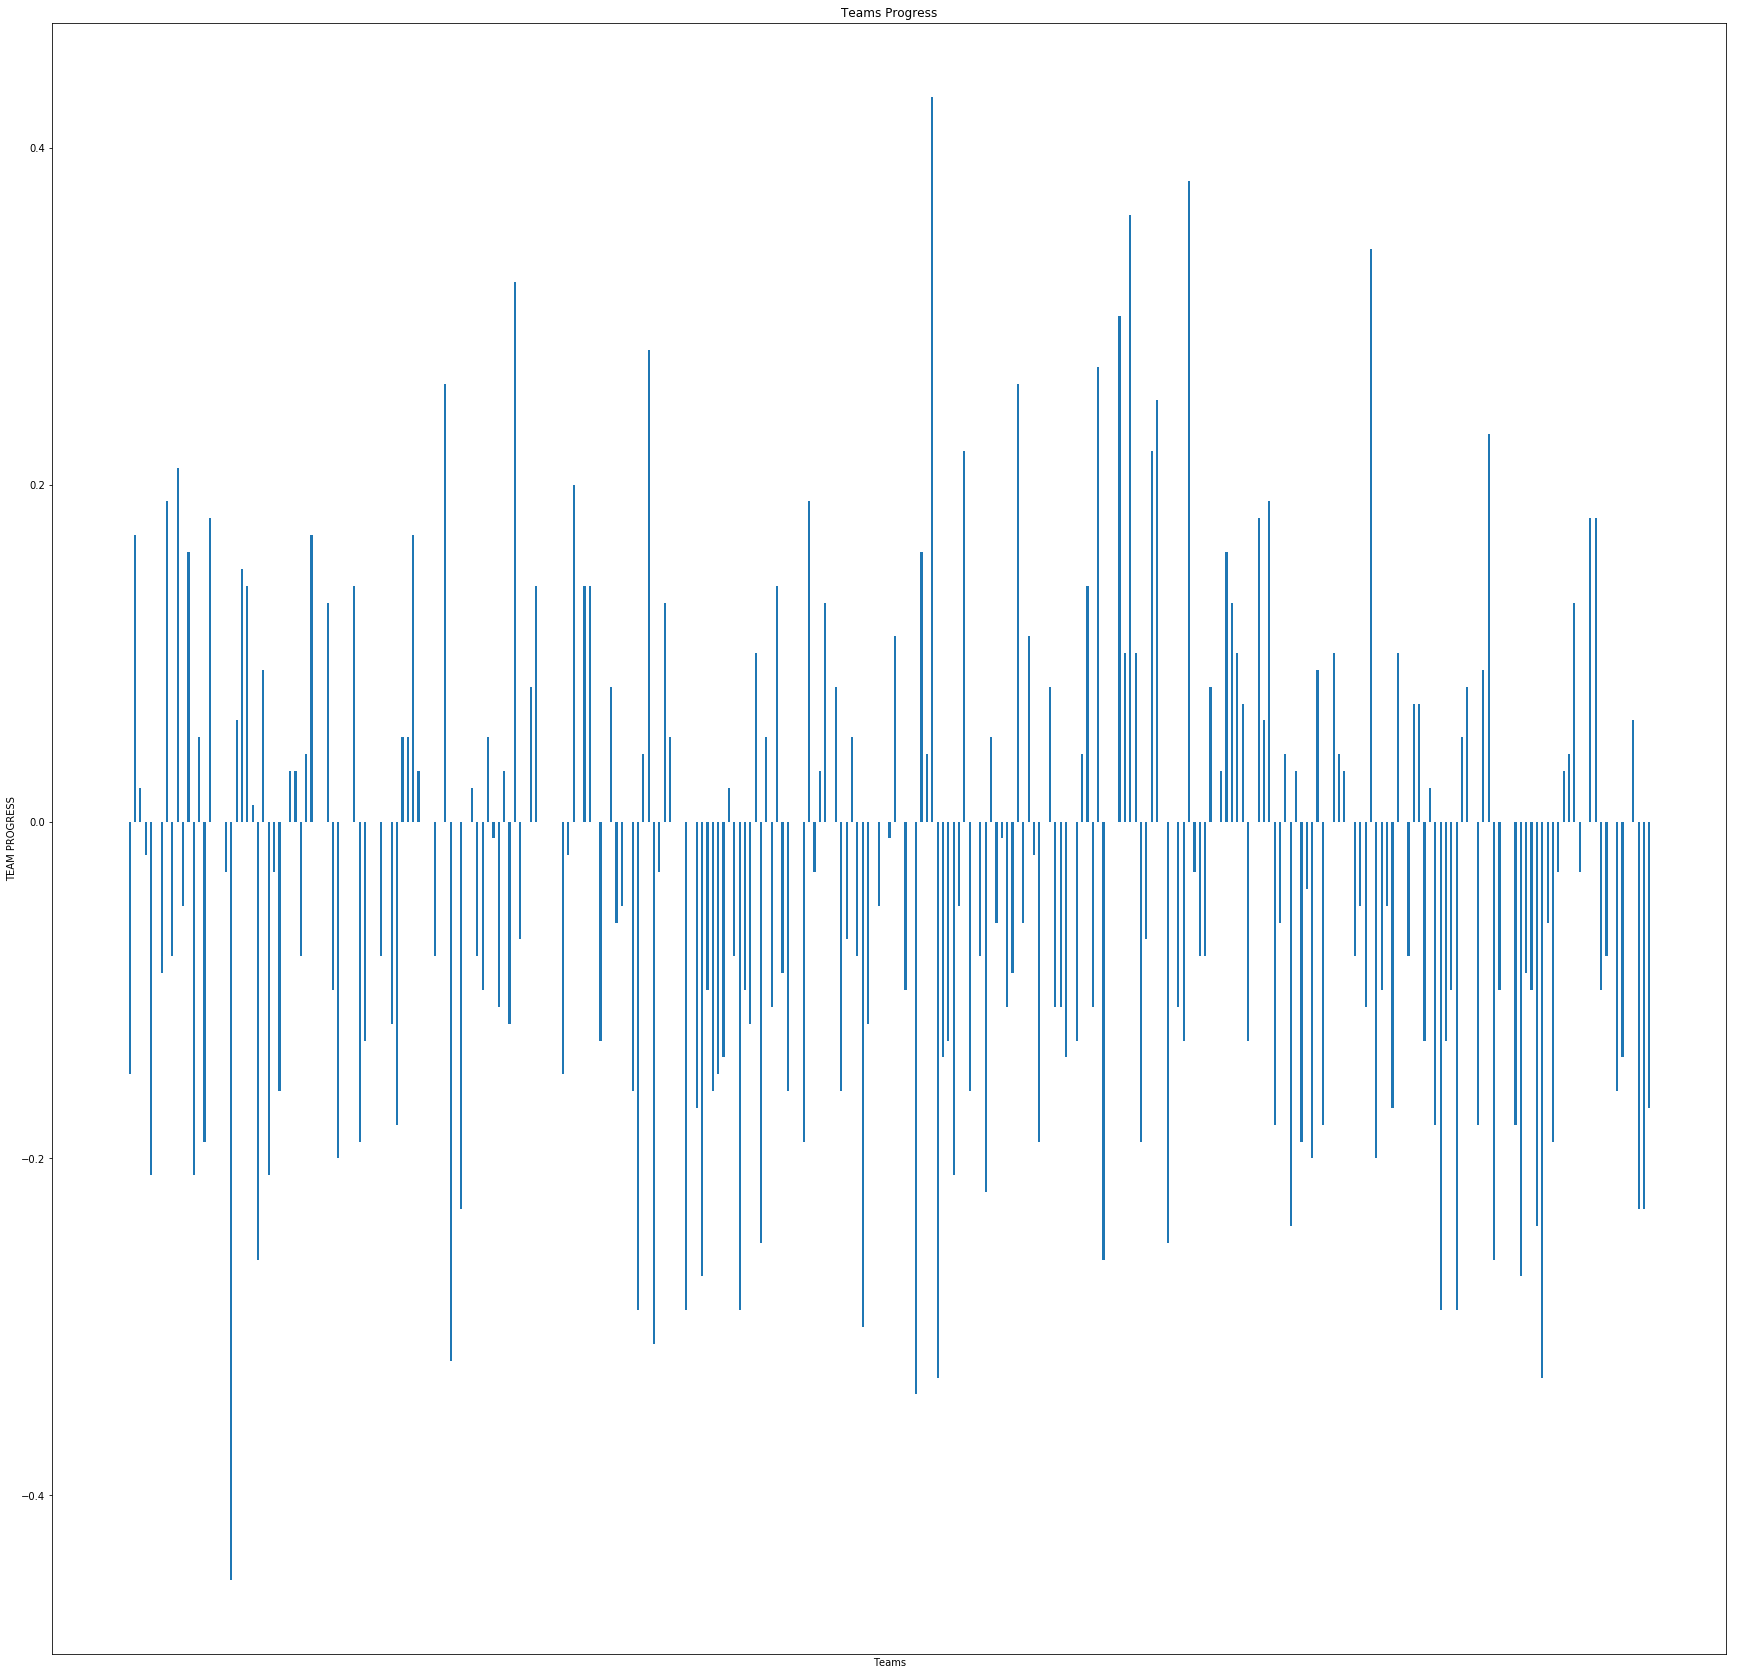

In [94]:
sorted_progress = teams_progress_results.sort_values(by=['progress_result'], ascending=False)
bars_plotter(sorted_progress)

This graph shows an overview of the progress of all available teams in the dateset we have, the progress can be positive (which means that the team is getting better) or negative (which means that the team is getting worse), this graph's purpose is to see wether there are teams with high progress over the seasons and how many of them are, and same for the teams with the lowest profress over the seasons.

### Best Three progressed teams over the seaons

In [95]:
best_progress_teams = teams_progress_results.sort_values(by=['progress_result'], ascending=False).head(3)
best_progress_teams

,team,progress_result
272,Leicester City,0.43
195,RKC Waalwijk,0.38
245,Pogoń Szczecin,0.36


In [132]:
def progress_graph_plotter(mask):
    plt.figure(figsize=(20, 10))
    plt.plot(mask.season, mask.win_ratio, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
    plt.plot(mask.season, mask.draw_ratio, color='orange', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
    plt.plot(mask.season, mask.loss_ratio, color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
    plt.xlabel('SEASONS')
    plt.ylabel('RATIO')
    plt.title('Team Progress')
    plt.legend()
    plt.show()

### 1) Leicester City

In [97]:
Leicester_City_mask = all_seasons_stats_df[all_seasons_stats_df['team'] == 'Leicester City']
Leicester_City_mask

,team,league,season,team_id,wins,draws,loss,total available records,win_ratio,draw_ratio,loss_ratio,scored goals,incoming goals
142,Leicester City,England Premier League,2014/2015,8197,11,8,19,38,0.29,0.21,0.50,46,55
142,Leicester City,England Premier League,2015/2016,8197,23,12,3,38,0.61,0.32,0.08,68,36


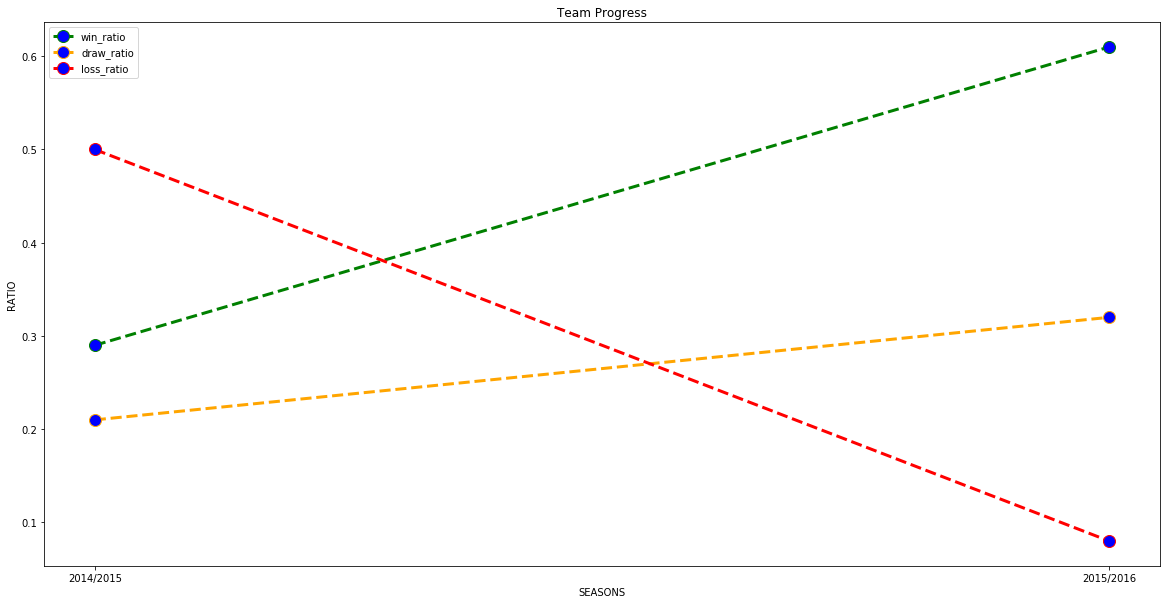

In [133]:
progress_graph_plotter(Leicester_City_mask)

This graph shows the progress of Leicester City team (the best progressed team with a progress score of 0.43) over two seasons (the available records) of : 2014/2015 and 2015/2016 showing the changes over seasons in win, draw and loss ratio.

**Notice** increase in the both of the winning ratio and the draw ratio, and decrease in the loss ratio

### 1) RKC Waalwijk

In [99]:
RKC_Waalwijk_mask = all_seasons_stats_df[all_seasons_stats_df['team'] == 'RKC Waalwijk']
RKC_Waalwijk_mask

,team,league,season,team_id,wins,draws,loss,total available records,win_ratio,draw_ratio,loss_ratio,scored goals,incoming goals
217,RKC Waalwijk,Netherlands Eredivisie,2009/2010,10219,5,0,29,34,0.15,0.00,0.85,30,80
217,RKC Waalwijk,Netherlands Eredivisie,2011/2012,10219,13,6,15,34,0.38,0.18,0.44,40,49
217,RKC Waalwijk,Netherlands Eredivisie,2012/2013,10219,9,10,15,34,0.26,0.29,0.44,39,48
217,RKC Waalwijk,Netherlands Eredivisie,2013/2014,10219,7,11,16,34,0.21,0.32,0.47,44,64


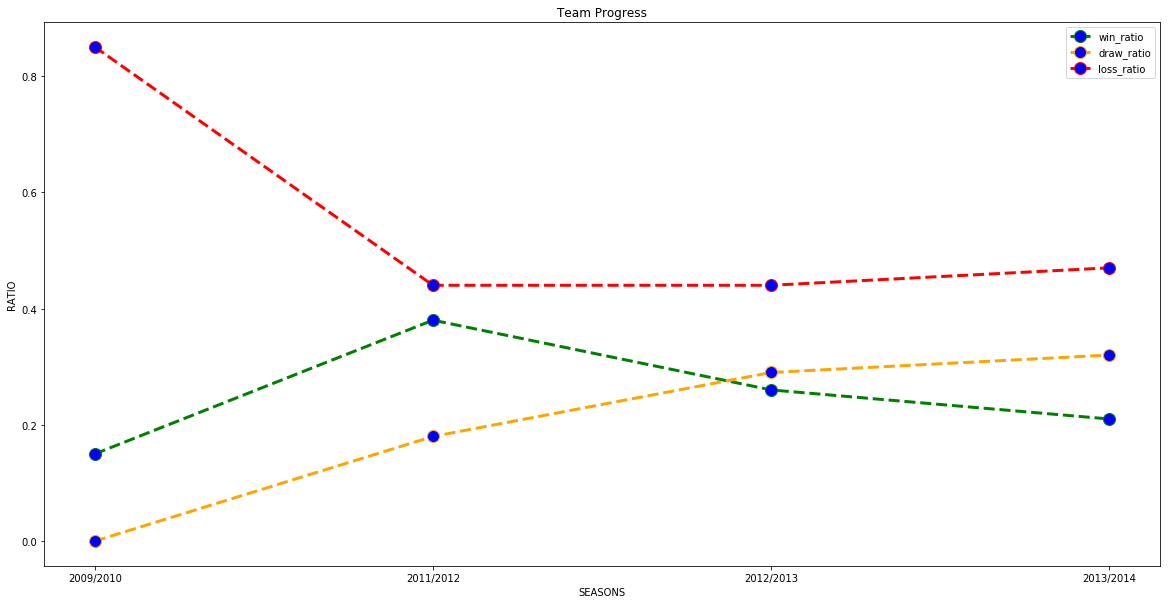

In [100]:
progress_graph_plotter(RKC_Waalwijk_mask)

This graph shows the progress of RKC Waalwijk team (the second best progressed team with a progress score of 0.38) over 4 seasons (the available records)  of: 2009/2010, 2011/2012,  2012/2013, 2013/2014 showing the changes over seasons in win, draw and loss ratio.

**Notice** increase in the draw ratio, and decrease in the loss ratio, where the win ratio is nearly stable

### 3) Pogoń Szczecin

In [101]:
Pogoń_Szczecin_mask = all_seasons_stats_df[all_seasons_stats_df['team'] == 'Pogoń Szczecin']
Pogoń_Szczecin_mask

,team,league,season,team_id,wins,draws,loss,total available records,win_ratio,draw_ratio,loss_ratio,scored goals,incoming goals
199,Pogoń Szczecin,Poland Ekstraklasa,2012/2013,8023,10,5,15,30,0.33,0.17,0.50,29,39
199,Pogoń Szczecin,Poland Ekstraklasa,2013/2014,8023,11,14,5,30,0.37,0.47,0.17,47,38
199,Pogoń Szczecin,Poland Ekstraklasa,2014/2015,8023,11,8,11,30,0.37,0.27,0.37,40,38
199,Pogoń Szczecin,Poland Ekstraklasa,2015/2016,8023,10,16,4,30,0.33,0.53,0.13,36,30


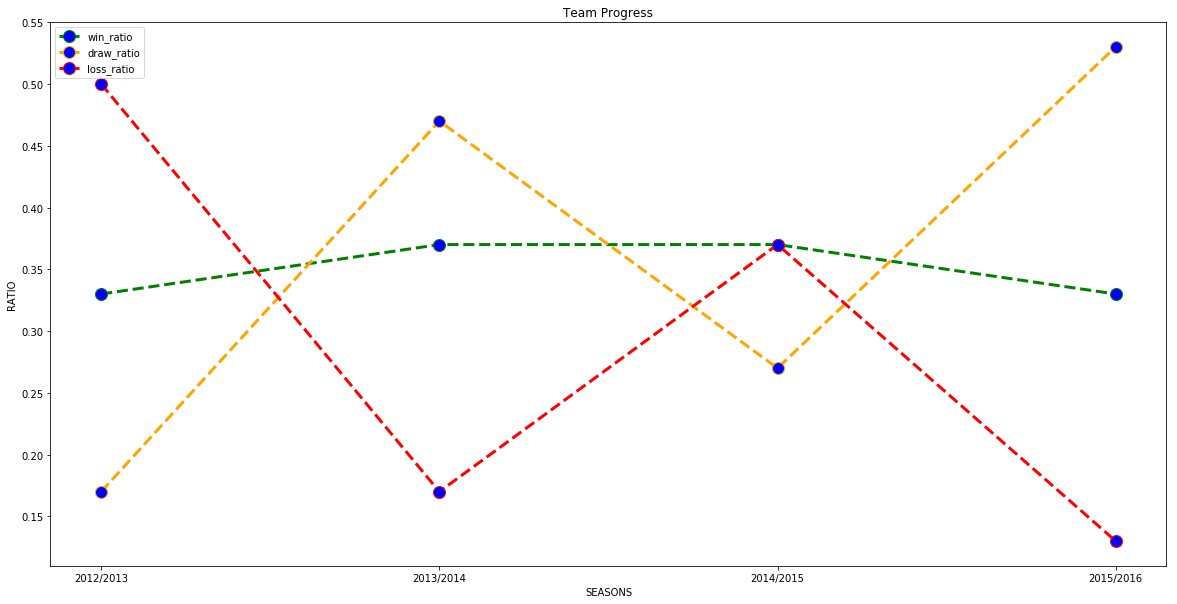

In [102]:
progress_graph_plotter(Pogoń_Szczecin_mask)

This graph shows the progress of Pogoń Szczecin team (the third best progressed team with a progress score of 0.36) over 4 seasons (the available records) of: 2012/2013, 2013/2014, 2014/2015, 2015/2016 showing the changes over seasons in win, draw and loss ratio.

**Notice** both the draw ratio and the loss ratio are changing constantly but where the loss ratio is decreasing in general and the draw ratio is increasing in general, otherwise the win ratio is stable.

### Extra research question : what teams improved the least over the time period

In [103]:
worst_progress_team = teams_progress_results.sort_values(by=['progress_result'], ascending=False).tail(1)
worst_progress_team

,team,progress_result
11,Aston Villa,-0.45


#### Answer Aston Villa team

In [104]:
Aston_Villa_mask = all_seasons_stats_df[all_seasons_stats_df['team'] == 'Aston Villa']
Aston_Villa_mask

,team,league,season,team_id,wins,draws,loss,total available records,win_ratio,draw_ratio,loss_ratio,scored goals,incoming goals
15,Aston Villa,England Premier League,2008/2009,10252,17,11,10,38,0.45,0.29,0.26,54,48
15,Aston Villa,England Premier League,2009/2010,10252,17,13,8,38,0.45,0.34,0.21,52,39
15,Aston Villa,England Premier League,2010/2011,10252,12,12,14,38,0.32,0.32,0.37,48,59
15,Aston Villa,England Premier League,2011/2012,10252,7,17,14,38,0.18,0.45,0.37,37,53
15,Aston Villa,England Premier League,2012/2013,10252,10,11,17,38,0.26,0.29,0.45,47,69
15,Aston Villa,England Premier League,2013/2014,10252,10,8,20,38,0.26,0.21,0.53,39,61
15,Aston Villa,England Premier League,2014/2015,10252,10,8,20,38,0.26,0.21,0.53,31,57
15,Aston Villa,England Premier League,2015/2016,10252,3,8,27,38,0.08,0.21,0.71,27,76


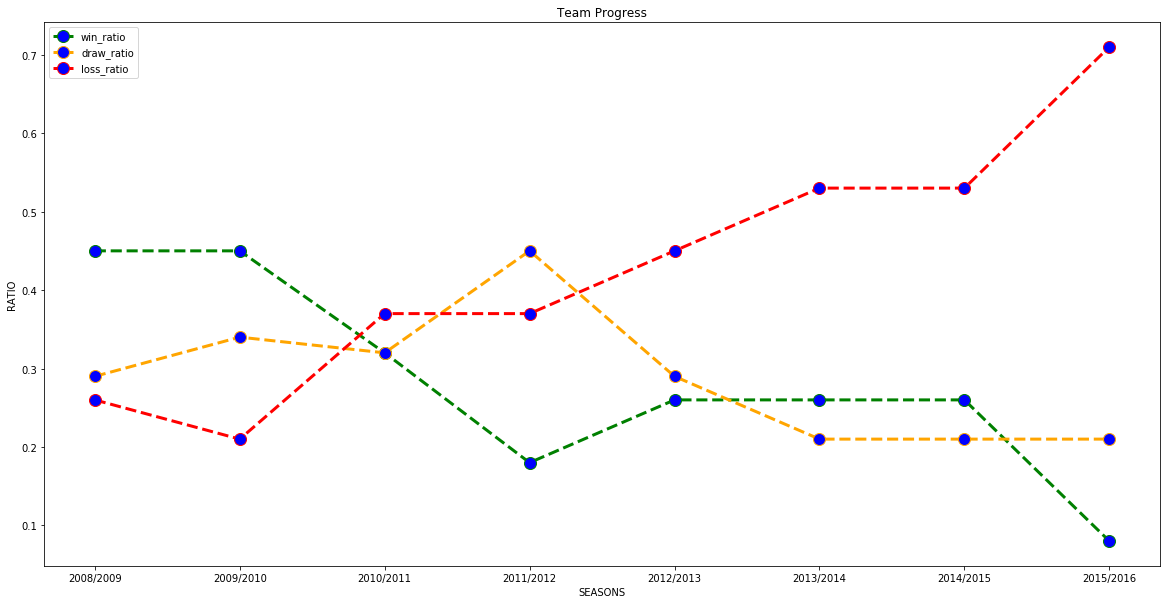

In [105]:
progress_graph_plotter(Aston_Villa_mask)

This graph shows the progress of Aston Villa team (the worst progressed team with a progress score of -0.45) over 8 seasons (the available records) of: 2008/2009, 2009/2010, 2010/2011, 2012/2013, 2013/2014, 2014/2015, 2015/2016 showing the changes over seasons in win, draw and loss ratio.

**Notice** decrease in both win and draw ratios, where the loss ratio increased a lot.


### Research Question 4 : Which player is the best player 

In [106]:
# Displayin dataset
full_player_attributes_df.head()

,player id,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,record id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,3,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,4,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,5,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [107]:
# Calculating and adding age column
full_player_attributes_df["age"] = (2022 - full_player_attributes_df.birthday.dt.year)
full_player_attributes_df.head()

,player id,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,record id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,30
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,30
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,3,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,30
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,4,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,30
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,5,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,30


### Viewing age distribution

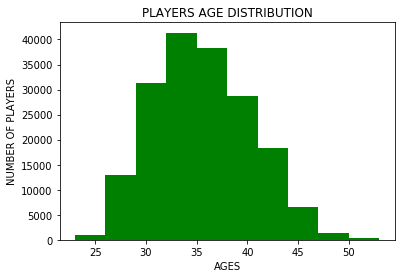

In [108]:
# Age hist()
sorted_by_age_df = full_player_attributes_df.sort_values(by=['age'], ascending=False)
sorted_by_age_df.age.plot(kind='hist', color='g')
plt.xlabel('AGES')
plt.ylabel('NUMBER OF PLAYERS')
plt.title('PLAYERS AGE DISTRIBUTION')
plt.show()

This graph is a histogram showing age distribution of all available players, where we can notice that most of players are in their 30's, some of them in range of 25-30 and 40-45. where there a small number of very young, and very old players.

### Viewing available records disribution

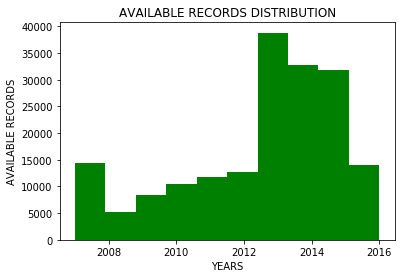

In [109]:
full_player_attributes_df.date.dt.year
full_player_attributes_df.date.dt.year.plot(kind='hist', color='g')
plt.xlabel('YEARS')
plt.ylabel('AVAILABLE RECORDS')
plt.title('AVAILABLE RECORDS DISTRIBUTION')
plt.show()

This graph shows the available players records by year, where we can notice that we don't have much records in the period of 2009 to 2012, where we have high number of records in 2008 and also in the lasy years.
The goal of displaying this graph is to see wether we have a balanced number of players records over the years or not.

### Preferred foot : Right vs Left

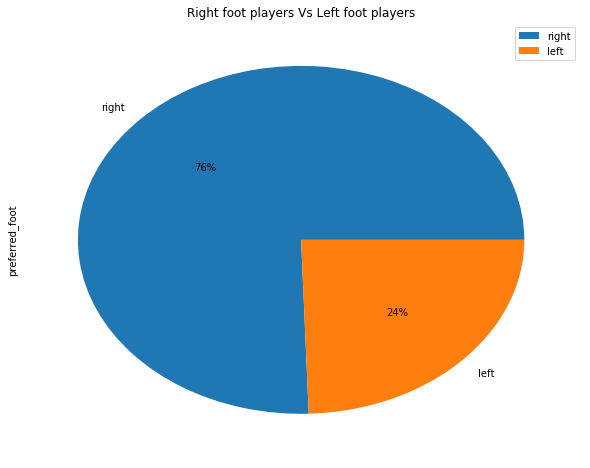

In [134]:
plt.figure(figsize=(10,8))
full_player_attributes_df['preferred_foot'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Right foot players Vs Left foot players')
plt.legend()
plt.show()

This graphs compares between the number of left footed players Vs the right footed players, where we can notice that 76% of players prefer right foot and only 24% prefer left foot.

### Getting the best rated player in the last recorded year

In [111]:
# Selecting records of the last recorded year
latest_full_player_attributes_df = full_player_attributes_df[full_player_attributes_df.date.dt.year == full_player_attributes_df.date.dt.year.max()]
# Sorting output by overall rating
players_latest_averal_rating = pd.DataFrame(latest_full_player_attributes_df.groupby('player_name')['overall_rating'].mean()).sort_values(by=['overall_rating'], ascending=False)
# Rouding values for a cleaner output
players_latest_averal_rating.overall_rating = players_latest_averal_rating.overall_rating.round()

### Best 10 rated players in the last recorded year

In [112]:
players_latest_averal_rating.head(10)

,overall_rating
player_name,
Manuel Neuer,90.0
Neymar,90.0
Arjen Robben,89.0
Sergio Aguero,88.0
Mesut Oezil,88.0
Eden Hazard,88.0
Robert Lewandowski,88.0
Philipp Lahm,87.0
Jerome Boateng,87.0


### Oldest player

In [113]:
latest_full_player_attributes_df[latest_full_player_attributes_df.birthday.dt.year == latest_full_player_attributes_df.birthday.dt.year.min()]

,player id,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,record id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
112581,6887,30633,Mark Schwarzer,684,1972-10-06,193.04,209,114794,2016-04-07,73.0,73.0,right,medium,medium,13.0,11.0,14.0,24.0,17.0,13.0,14.0,11.0,23.0,17.0,23.0,26.0,36.0,76.0,43.0,29.0,55.0,19.0,70.0,18.0,40.0,22.0,19.0,31.0,34.0,17.0,19.0,20.0,70.0,73.0,67.0,78.0,69.0,50


### Youngest players

In [114]:
youngest_players = latest_full_player_attributes_df[latest_full_player_attributes_df.birthday.dt.year == latest_full_player_attributes_df.birthday.dt.year.max()]
youngest_players

,player id,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,record id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
4409,272,698273,Alban Lafont,231691,1999-01-23,193.04,170,4500,2016-03-10,70.0,86.0,right,medium,medium,13.0,6.0,13.0,52.0,9.0,14.0,13.0,12.0,38.0,10.0,28.0,23.0,35.0,58.0,27.0,23.0,68.0,55.0,62.0,9.0,20.0,42.0,4.0,43.0,16.0,5.0,14.0,12.0,72.0,71.0,69.0,71.0,72.0,23
4410,272,698273,Alban Lafont,231691,1999-01-23,193.04,170,4501,2016-01-28,67.0,83.0,right,medium,medium,13.0,6.0,13.0,28.0,9.0,14.0,13.0,12.0,27.0,10.0,28.0,23.0,35.0,43.0,27.0,23.0,68.0,55.0,62.0,9.0,20.0,10.0,4.0,37.0,16.0,5.0,14.0,12.0,69.0,72.0,68.0,69.0,68.0,23
62555,3827,618878,Gianluigi Donnarumma,230621,1999-02-25,195.58,198,63877,2016-04-14,73.0,86.0,right,medium,medium,12.0,12.0,12.0,30.0,8.0,20.0,12.0,14.0,24.0,26.0,46.0,48.0,52.0,72.0,35.0,24.0,60.0,30.0,60.0,18.0,30.0,26.0,14.0,50.0,24.0,12.0,14.0,16.0,78.0,66.0,74.0,70.0,80.0,23
62556,3827,618878,Gianluigi Donnarumma,230621,1999-02-25,195.58,198,63878,2016-03-24,71.0,86.0,right,medium,medium,12.0,12.0,12.0,30.0,8.0,20.0,12.0,14.0,24.0,26.0,46.0,48.0,52.0,72.0,35.0,24.0,60.0,30.0,60.0,18.0,30.0,26.0,14.0,50.0,24.0,12.0,14.0,16.0,74.0,64.0,74.0,69.0,78.0,23
62557,3827,618878,Gianluigi Donnarumma,230621,1999-02-25,195.58,198,63879,2016-02-25,70.0,86.0,right,medium,medium,12.0,12.0,12.0,30.0,8.0,20.0,12.0,14.0,24.0,26.0,46.0,48.0,44.0,72.0,35.0,24.0,60.0,30.0,60.0,18.0,30.0,26.0,14.0,50.0,24.0,12.0,14.0,16.0,72.0,64.0,74.0,68.0,76.0,23
84191,5183,682552,Jonathan Leko,231408,1999-04-24,182.88,141,85953,2016-05-05,65.0,84.0,right,medium,medium,39.0,66.0,64.0,53.0,50.0,66.0,46.0,34.0,41.0,63.0,89.0,91.0,73.0,58.0,69.0,66.0,65.0,72.0,67.0,57.0,30.0,16.0,60.0,53.0,78.0,20.0,17.0,23.0,6.0,12.0,11.0,8.0,9.0,23
84192,5183,682552,Jonathan Leko,231408,1999-04-24,182.88,141,85954,2016-04-28,64.0,84.0,right,medium,medium,39.0,66.0,64.0,53.0,50.0,60.0,46.0,34.0,41.0,63.0,86.0,91.0,73.0,58.0,69.0,66.0,65.0,66.0,62.0,57.0,30.0,16.0,60.0,53.0,78.0,20.0,17.0,23.0,6.0,12.0,11.0,8.0,9.0,23


### Best youngest player

In [115]:
pd.DataFrame(youngest_players.groupby('player_name')['overall_rating'].mean()).sort_values(by='overall_rating', ascending=False).head(1)

,overall_rating
player_name,
Gianluigi Donnarumma,71.333333


<a id='conclusions'></a>
## Conclusions & Summary

### The team attributes lead to the most victories : FC Barcelona (best team of all seasons)

In [116]:
highest_win_ratio_team_of_all_time

,team,league,team_id,wins,draws,loss,total available records,win ratio,draw ratio,loss ratio,scored goals,incoming goals
22,FC Barcelona,Spain LIGA BBVA,8634,234,43,27,304,0.77,0.14,0.09,849,232


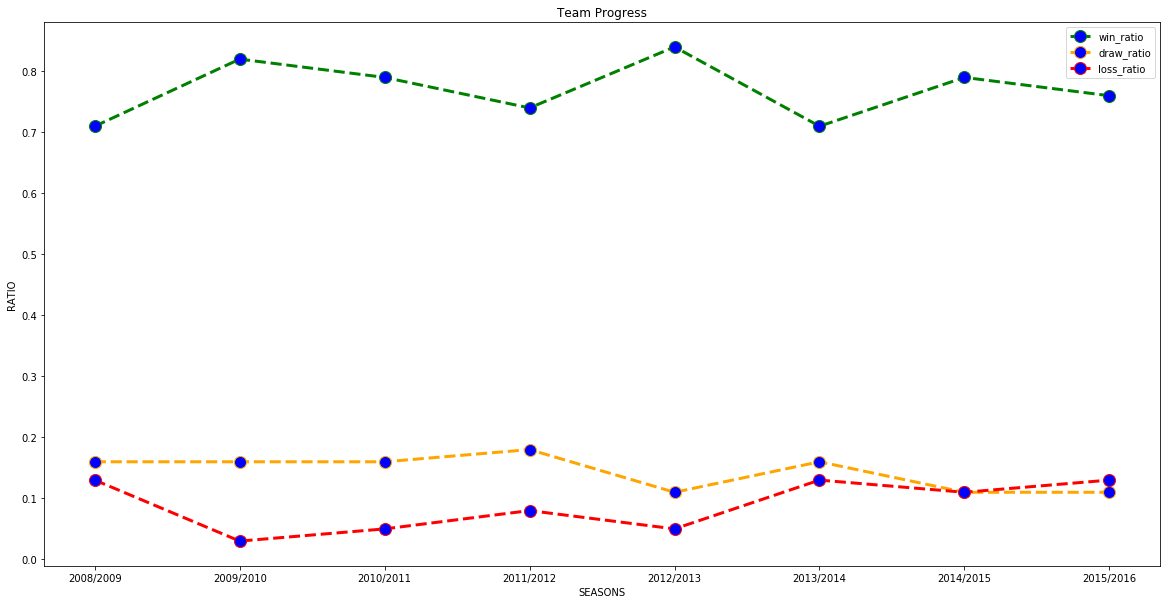

In [117]:
FCB_mask = all_seasons_stats_df[all_seasons_stats_df['team'] == 'FC Barcelona']
progress_graph_plotter(FCB_mask)

FC Barcelona is the best team in all seasons in all leagues with :

- win/draw/loss : 234/43/27
- 849 goals

Also FC Barcelona level was stable during all last seasons, with a high winning ratio of more than 70% each season and a low draw/loss ratio of less than 20% each season

### The team attributes lead to the most victories : (best team in each season)

In [118]:
highest_win_ratio_team_current_season

,team,league,season,team_id,wins,draws,loss,total available records,win ratio,draw ratio,loss ratio,scored goals,incoming goals
21,AZ,Netherlands Eredivisie,2008/2009,10229,25,5,4,34,0.74,0.15,0.12,66,22
159,Manchester United,England Premier League,2008/2009,10260,28,6,4,38,0.74,0.16,0.11,68,24
22,FC Barcelona,Spain LIGA BBVA,2009/2010,8634,31,6,1,38,0.82,0.16,0.03,98,24
210,Real Madrid CF,Spain LIGA BBVA,2009/2010,8633,31,3,4,38,0.82,0.08,0.11,102,35
87,FC Porto,Portugal Liga ZON Sagres,2010/2011,9773,27,3,0,30,0.90,0.10,0.00,73,16
210,Real Madrid CF,Spain LIGA BBVA,2011/2012,8633,32,4,2,38,0.84,0.11,0.05,121,32
26,FC Bayern Munich,Germany 1. Bundesliga,2012/2013,9823,29,4,1,34,0.85,0.12,0.03,98,18
126,Juventus,Italy Serie A,2013/2014,9885,33,3,2,38,0.87,0.08,0.05,80,23
203,PSV,Netherlands Eredivisie,2014/2015,8640,29,1,4,34,0.85,0.03,0.12,92,31
31,SL Benfica,Portugal Liga ZON Sagres,2015/2016,9772,29,1,4,34,0.85,0.03,0.12,88,22


In [119]:
highest_win_ratio_team_current_season.describe().drop(['count', 'std', '25%', '50%', '75%'], axis=0)

,team_id,wins,draws,loss,total available records,win ratio,draw ratio,loss ratio,scored goals,incoming goals
mean,9428.2,29.4,3.6,2.6,35.6,0.828,0.102,0.074,88.6,24.7
min,8633.0,25.0,1.0,0.0,30.0,0.740,0.030,0.000,66.0,16.0
max,10260.0,33.0,6.0,4.0,38.0,0.900,0.160,0.120,121.0,35.0


The best teams in every season for the last 8  recorded seasons with :

- an average number goals of 87 goal per season
- an average win ratio of 83 %

### The playing (winning) strategy - game plan

Best playing strategy that was taken from the two best attacking and defending teams:
- Best Attacking team : Real Madrid CF with : 

In [120]:
best_offence_game_plans

,team_api_id,team_long_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass
1239,8633,Real Madrid CF,2010-02-22,55,Balanced,48.607362,Little,30,Short,Free Form,70,Risky,60,Normal,70,Lots,Free Form
1240,8633,Real Madrid CF,2011-02-22,54,Balanced,48.607362,Little,39,Mixed,Free Form,67,Risky,60,Normal,67,Lots,Free Form
1241,8633,Real Madrid CF,2012-02-22,45,Balanced,48.607362,Little,35,Mixed,Free Form,71,Risky,54,Normal,73,Lots,Free Form


- Best Defending team : FC Porto

In [121]:
best_defence_game_plans

,team_api_id,team_long_name,date,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1038,9773,FC Porto,2010-02-22,30,Deep,30,Contain,30,Narrow,Offside Trap
1039,9773,FC Porto,2011-02-22,55,Medium,43,Press,65,Normal,Cover


**Therefore** the best playing strategy to increase the winning ratio is this :

In [122]:
best_strategy

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,45,Balanced,48.607362,Little,35,Mixed,Free Form,71,Risky,54,Normal,73,Lots,Free Form,55,Medium,43,Press,65,Normal,Cover


### What teams improved the most over the time period

#### Leicester City
> PS : Only 2 seasons records are available

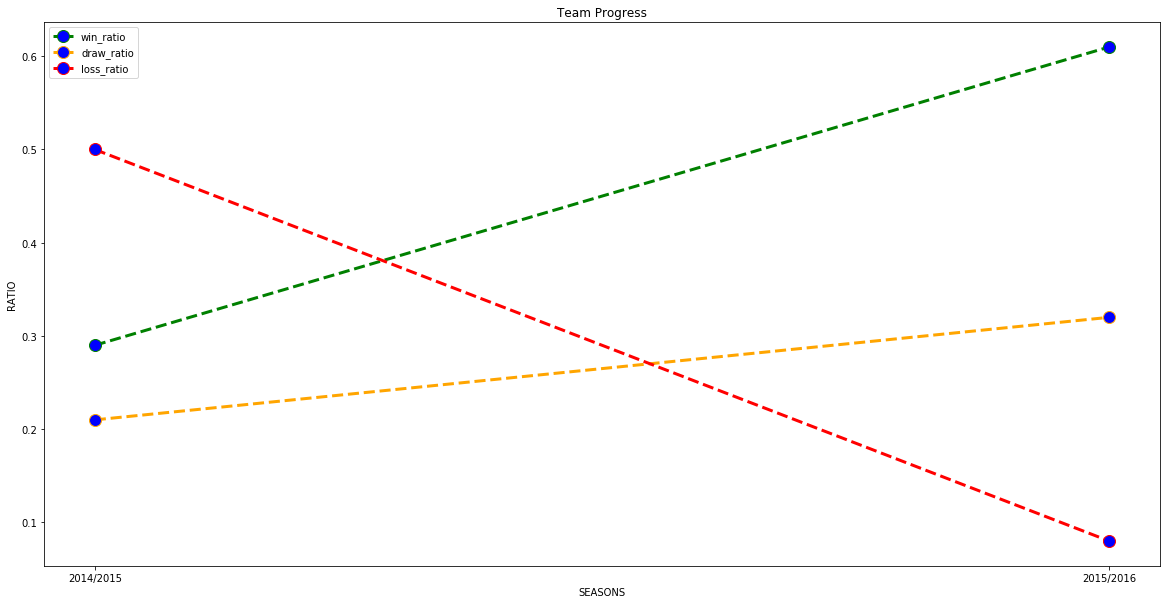

In [123]:
progress_graph_plotter(Leicester_City_mask)

This graph shows the progress of Leicester City team (the best progressed team with a progress score of 0.43) over two seasons (the available records) of : 2014/2015 and 2015/2016 showing the changes over seasons in win, draw and loss ratio.

**Notice** increase in the both of the winning ratio and the draw ratio, and decrease in the loss ratio

#### RKC Waalwijk

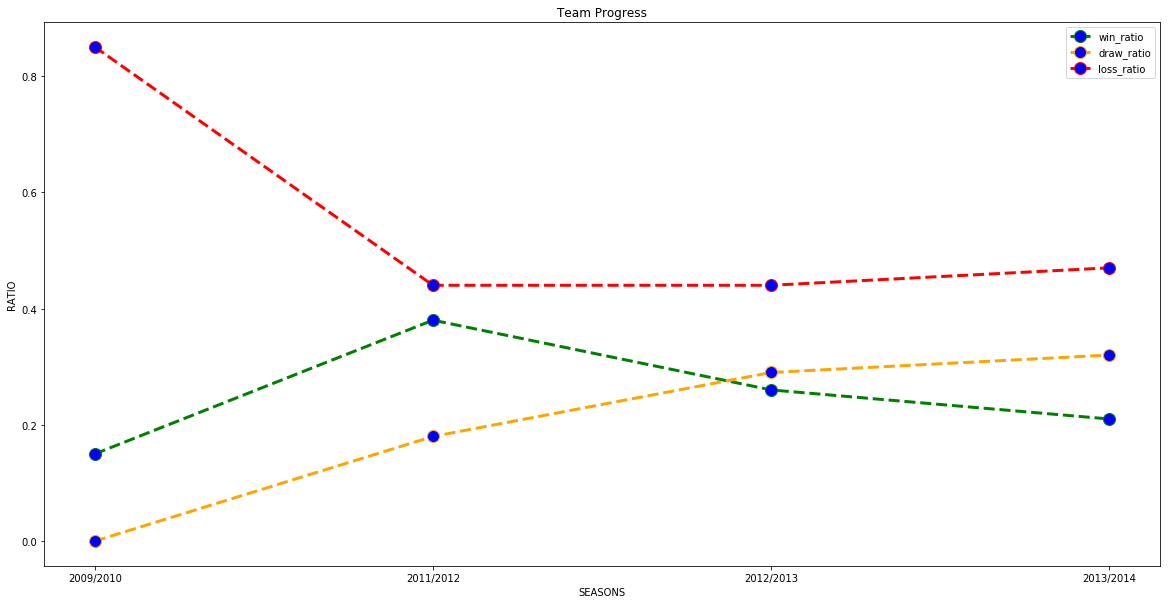

In [124]:
progress_graph_plotter(RKC_Waalwijk_mask)

This graph shows the progress of RKC Waalwijk team (the second best progressed team with a progress score of 0.38) over 4 seasons (the available records)  of: 2009/2010, 2011/2012,  2012/2013, 2013/2014 showing the changes over seasons in win, draw and loss ratio.

**Notice** increase in the draw ratio, and decrease in the loss ratio, where the win ratio is nearly stable

#### Pogoń Szczecin

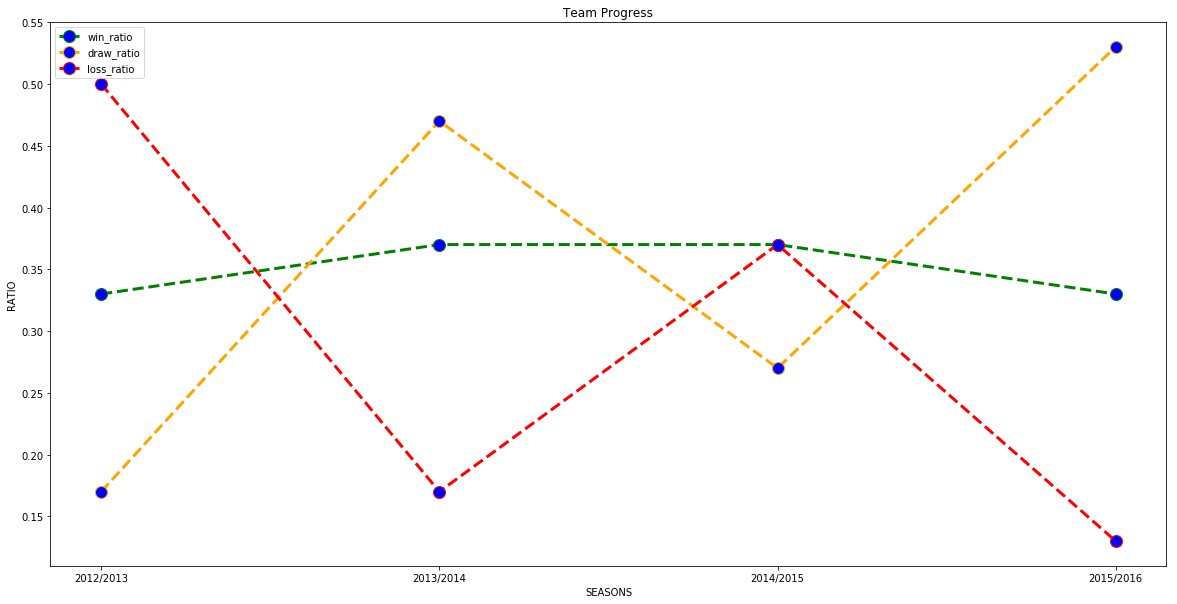

In [125]:
progress_graph_plotter(Pogoń_Szczecin_mask)

This graph shows the progress of Pogoń Szczecin team (the third best progressed team with a progress score of 0.36) over 4 seasons (the available records) of: 2012/2013, 2013/2014, 2014/2015, 2015/2016 showing the changes over seasons in win, draw and loss ratio.

**Notice** both the draw ratio and the loss ratio are changing constantly but where the loss ratio is decreasing in general and the draw ratio is increasing in general, otherwise the win ratio is stable.

### What teams improved the least over the time period : Aston Villa

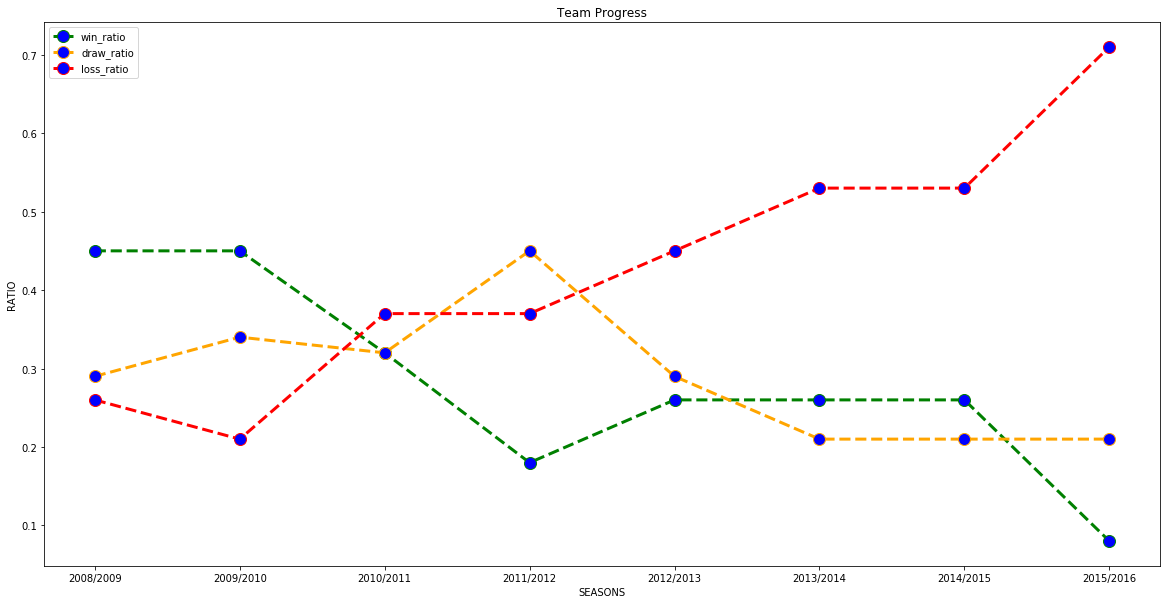

In [126]:
progress_graph_plotter(Aston_Villa_mask)

This graph shows the progress of Aston Villa team (the worst progressed team with a progress score of -0.45) over 8 seasons (the available records) of: 2008/2009, 2009/2010, 2010/2011, 2012/2013, 2013/2014, 2014/2015, 2015/2016 showing the changes over seasons in win, draw and loss ratio.

**Notice** decrease in both win and draw ratios, where the loss ratio increased a lot.

### Best players ( Top 3 overall rated players) 

In [127]:
players_latest_averal_rating.head(3)

,overall_rating
player_name,
Manuel Neuer,90.0
Neymar,90.0
Arjen Robben,89.0


Manuel Neuer, Neymar, Arjen Robben : these three players scored the highest overall ranking on average in the lastest records.

## Limitations

- **Unbalanced dataset**  when it comes to records, taking for example the number of players or teams records per year or seasons, I noticed that there are years with hight number of records unlike other years with low number of records. which can effect our analysis, taking for example when we tried to answer "What teams improved the most over the time period ?" question, where some teams have only two seasons records and other teams have 5 years records. which made our team comparison unfair to some teams, and especially for the teams with the highest number years records.

- **Incomplete/unexplainable dataset** concerning the match dataset, where we could've used many features like the number of yellow and red cards for each team in every match, and also players names instead of players numbers to answer questions like "which player has the most participations in official matchs" and also we could've used the last unexplained columns for the match dataset such us : VCH	VCD	VCA	GBH...

## Additional research that can be done 

- When answering the **"What team attributes lead to the most victories"**  and **"What teams improved the most/least over the time period"**  we could've filtered teams by their league, because not all leagues are the same, and in the same level of dificultty and with same level of matches, so comparing two different teams in two different leagues isn't that accurate, therefore we can filter teams by their league and then find the best team in every league, this way it will be fair for teams in high level leagues.

- We concluded and found the best players based on the overall rating for each player, where we could've make our research more deeper since we have features for every player, where we could've  filtered players by their playing position, to find the best players for each position (defender, goalkeeper... ) 

In [128]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0